In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm


from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 300
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

In [3]:

def readfile(path):
    bias = []
    curr = []
    res = []

    with open(path) as f:
        for line in f.readlines()[16:]:
            b, c, r = line.split()
            bias.append(float(b))
            curr.append(float(c))
            res.append(float(r))

        return pd.DataFrame({
            'U':bias,
            'I':curr,
            'R':res,
        })

data_1 = readfile('data/1.data')
data_2 = readfile('data/2.data')
data_3 = readfile('data/3.data')
data_4 = readfile('data/4.data')
data_5 = readfile('data/5.data')

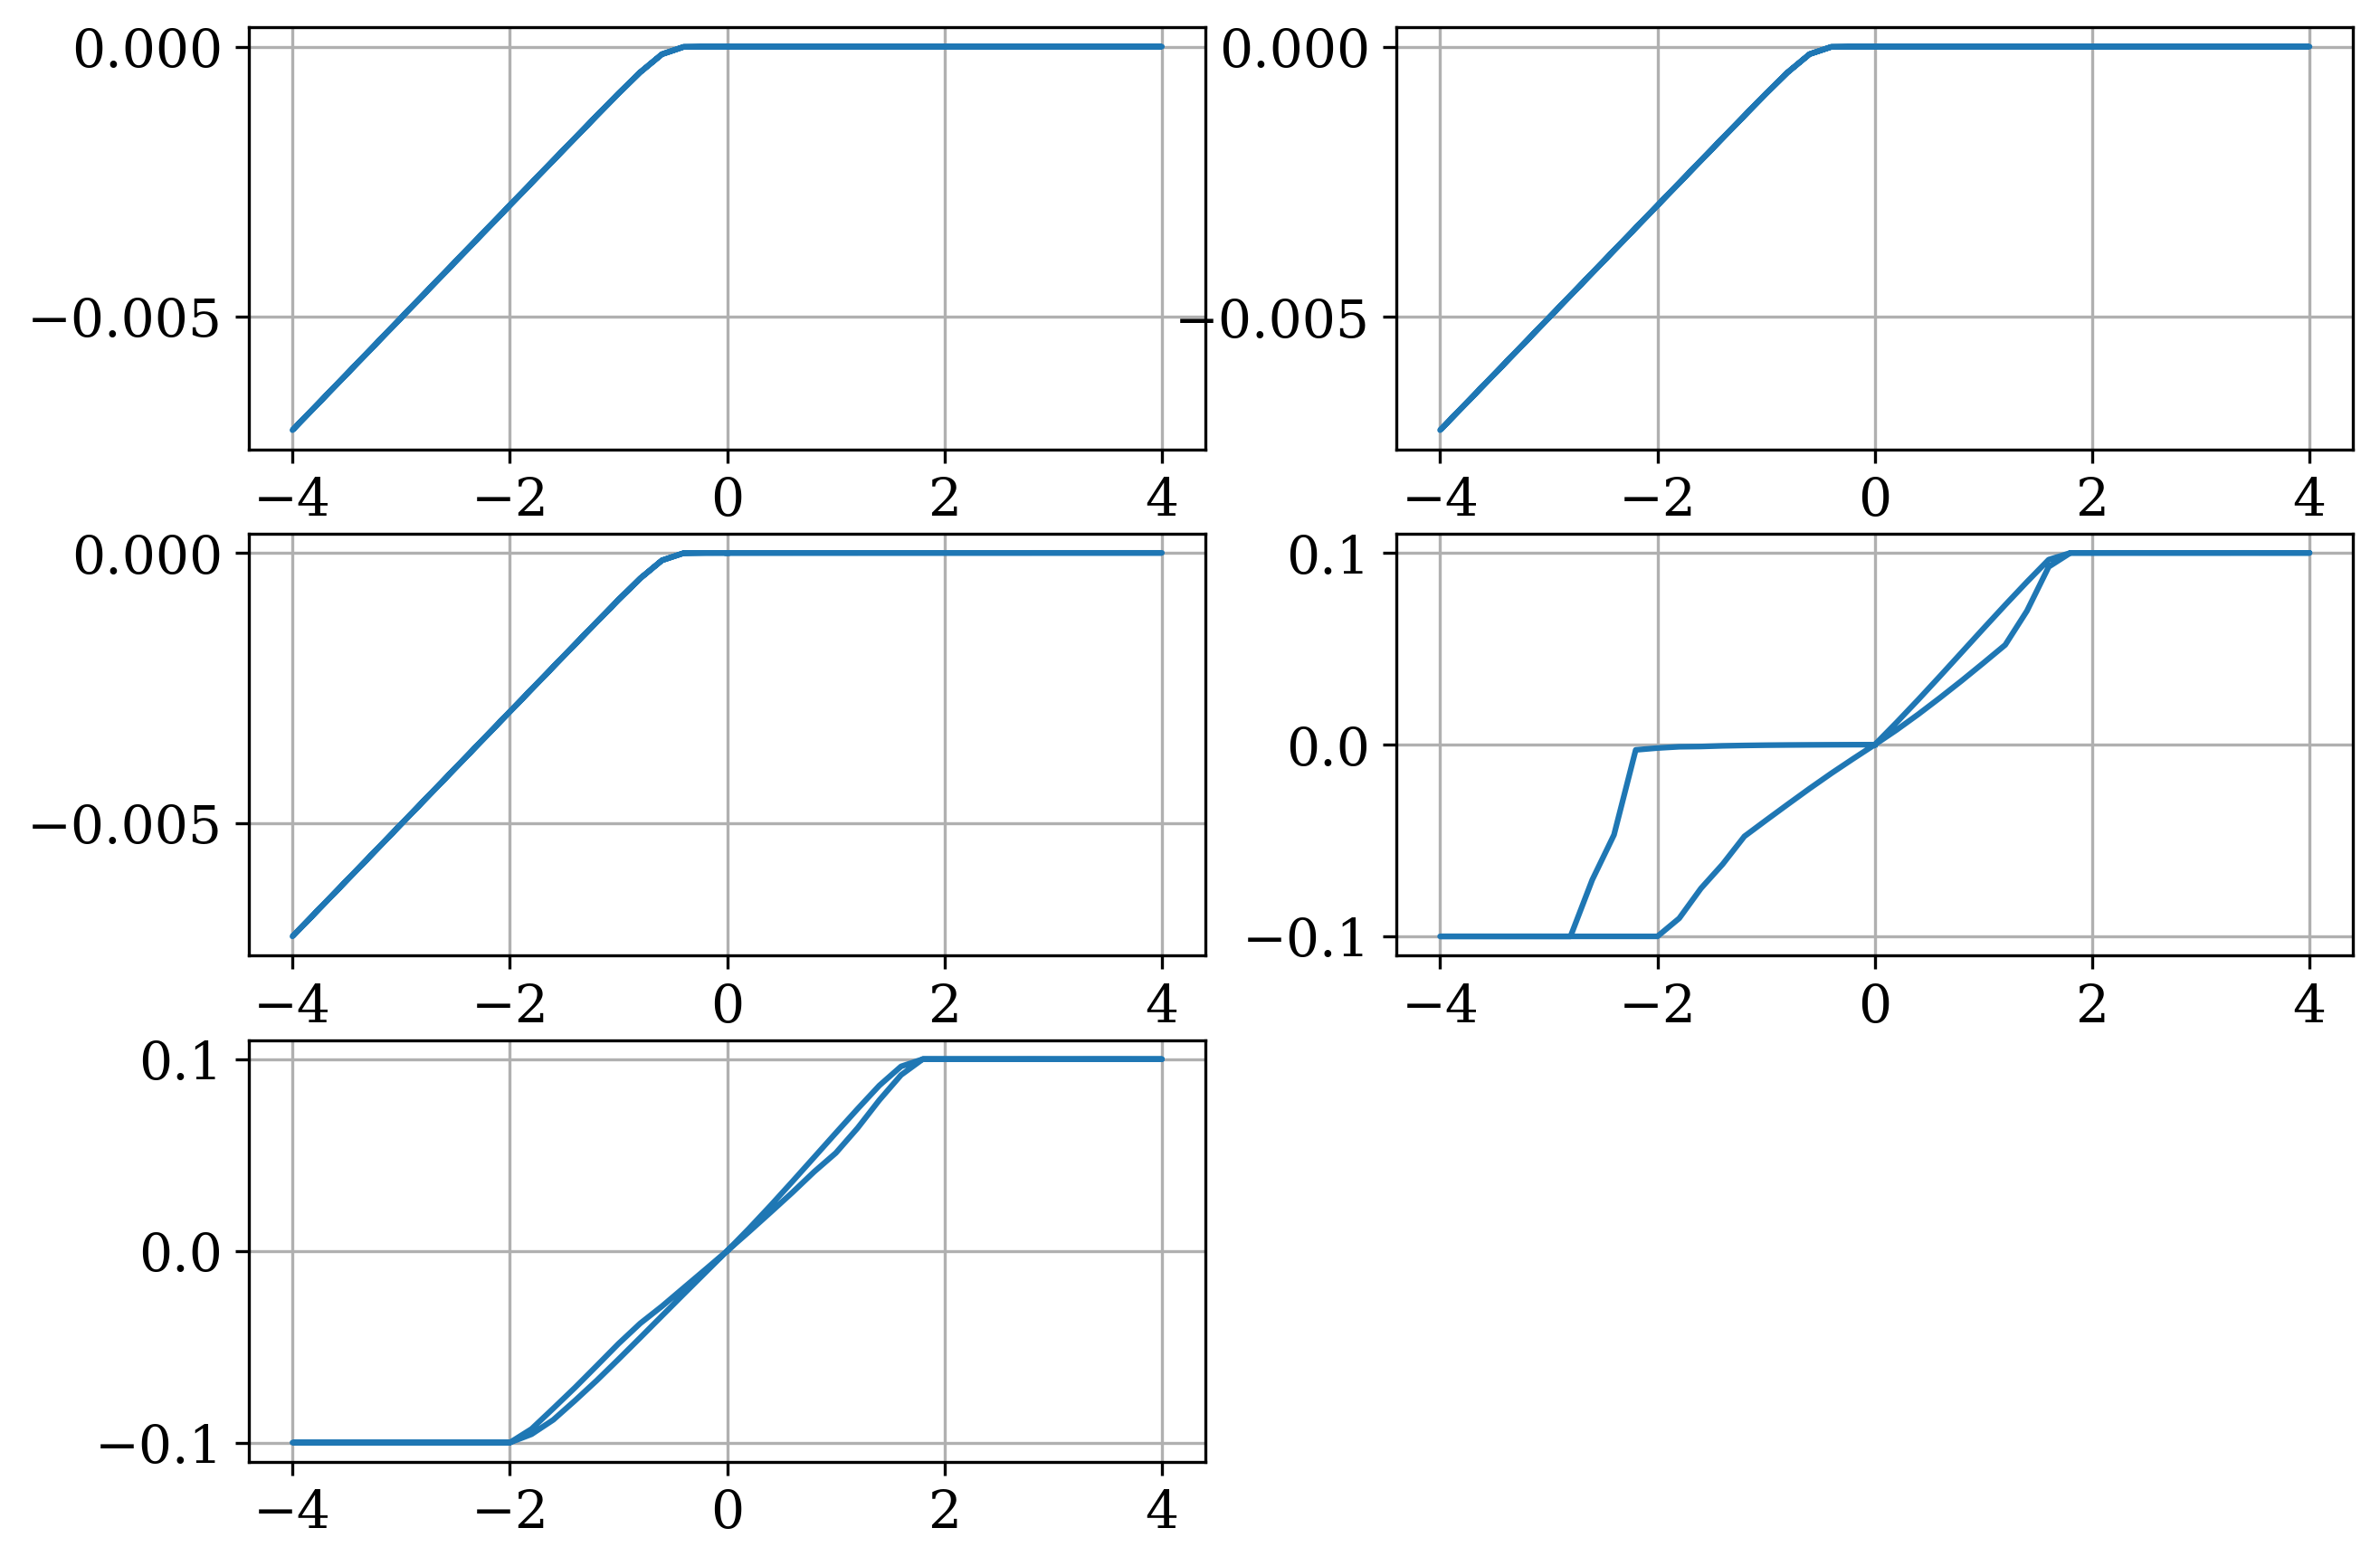

In [4]:
plt.subplot(321)
plt.plot(data_1.U, data_1.I)
plt.subplot(322)
plt.plot(data_2.U, data_2.I)
plt.subplot(323)
plt.plot(data_3.U, data_3.I)
plt.subplot(324)
plt.plot(data_4.U, data_4.I)
plt.subplot(325)
plt.plot(data_5.U, data_5.I)

In [25]:
vac = data_1
prob = data_4
ohm = data_5

vac.U *= -1
vac.I *= -1

vac["logI"] = np.log(np.abs(vac.I))
vac["log10I"] = np.log10(np.abs(vac.I))

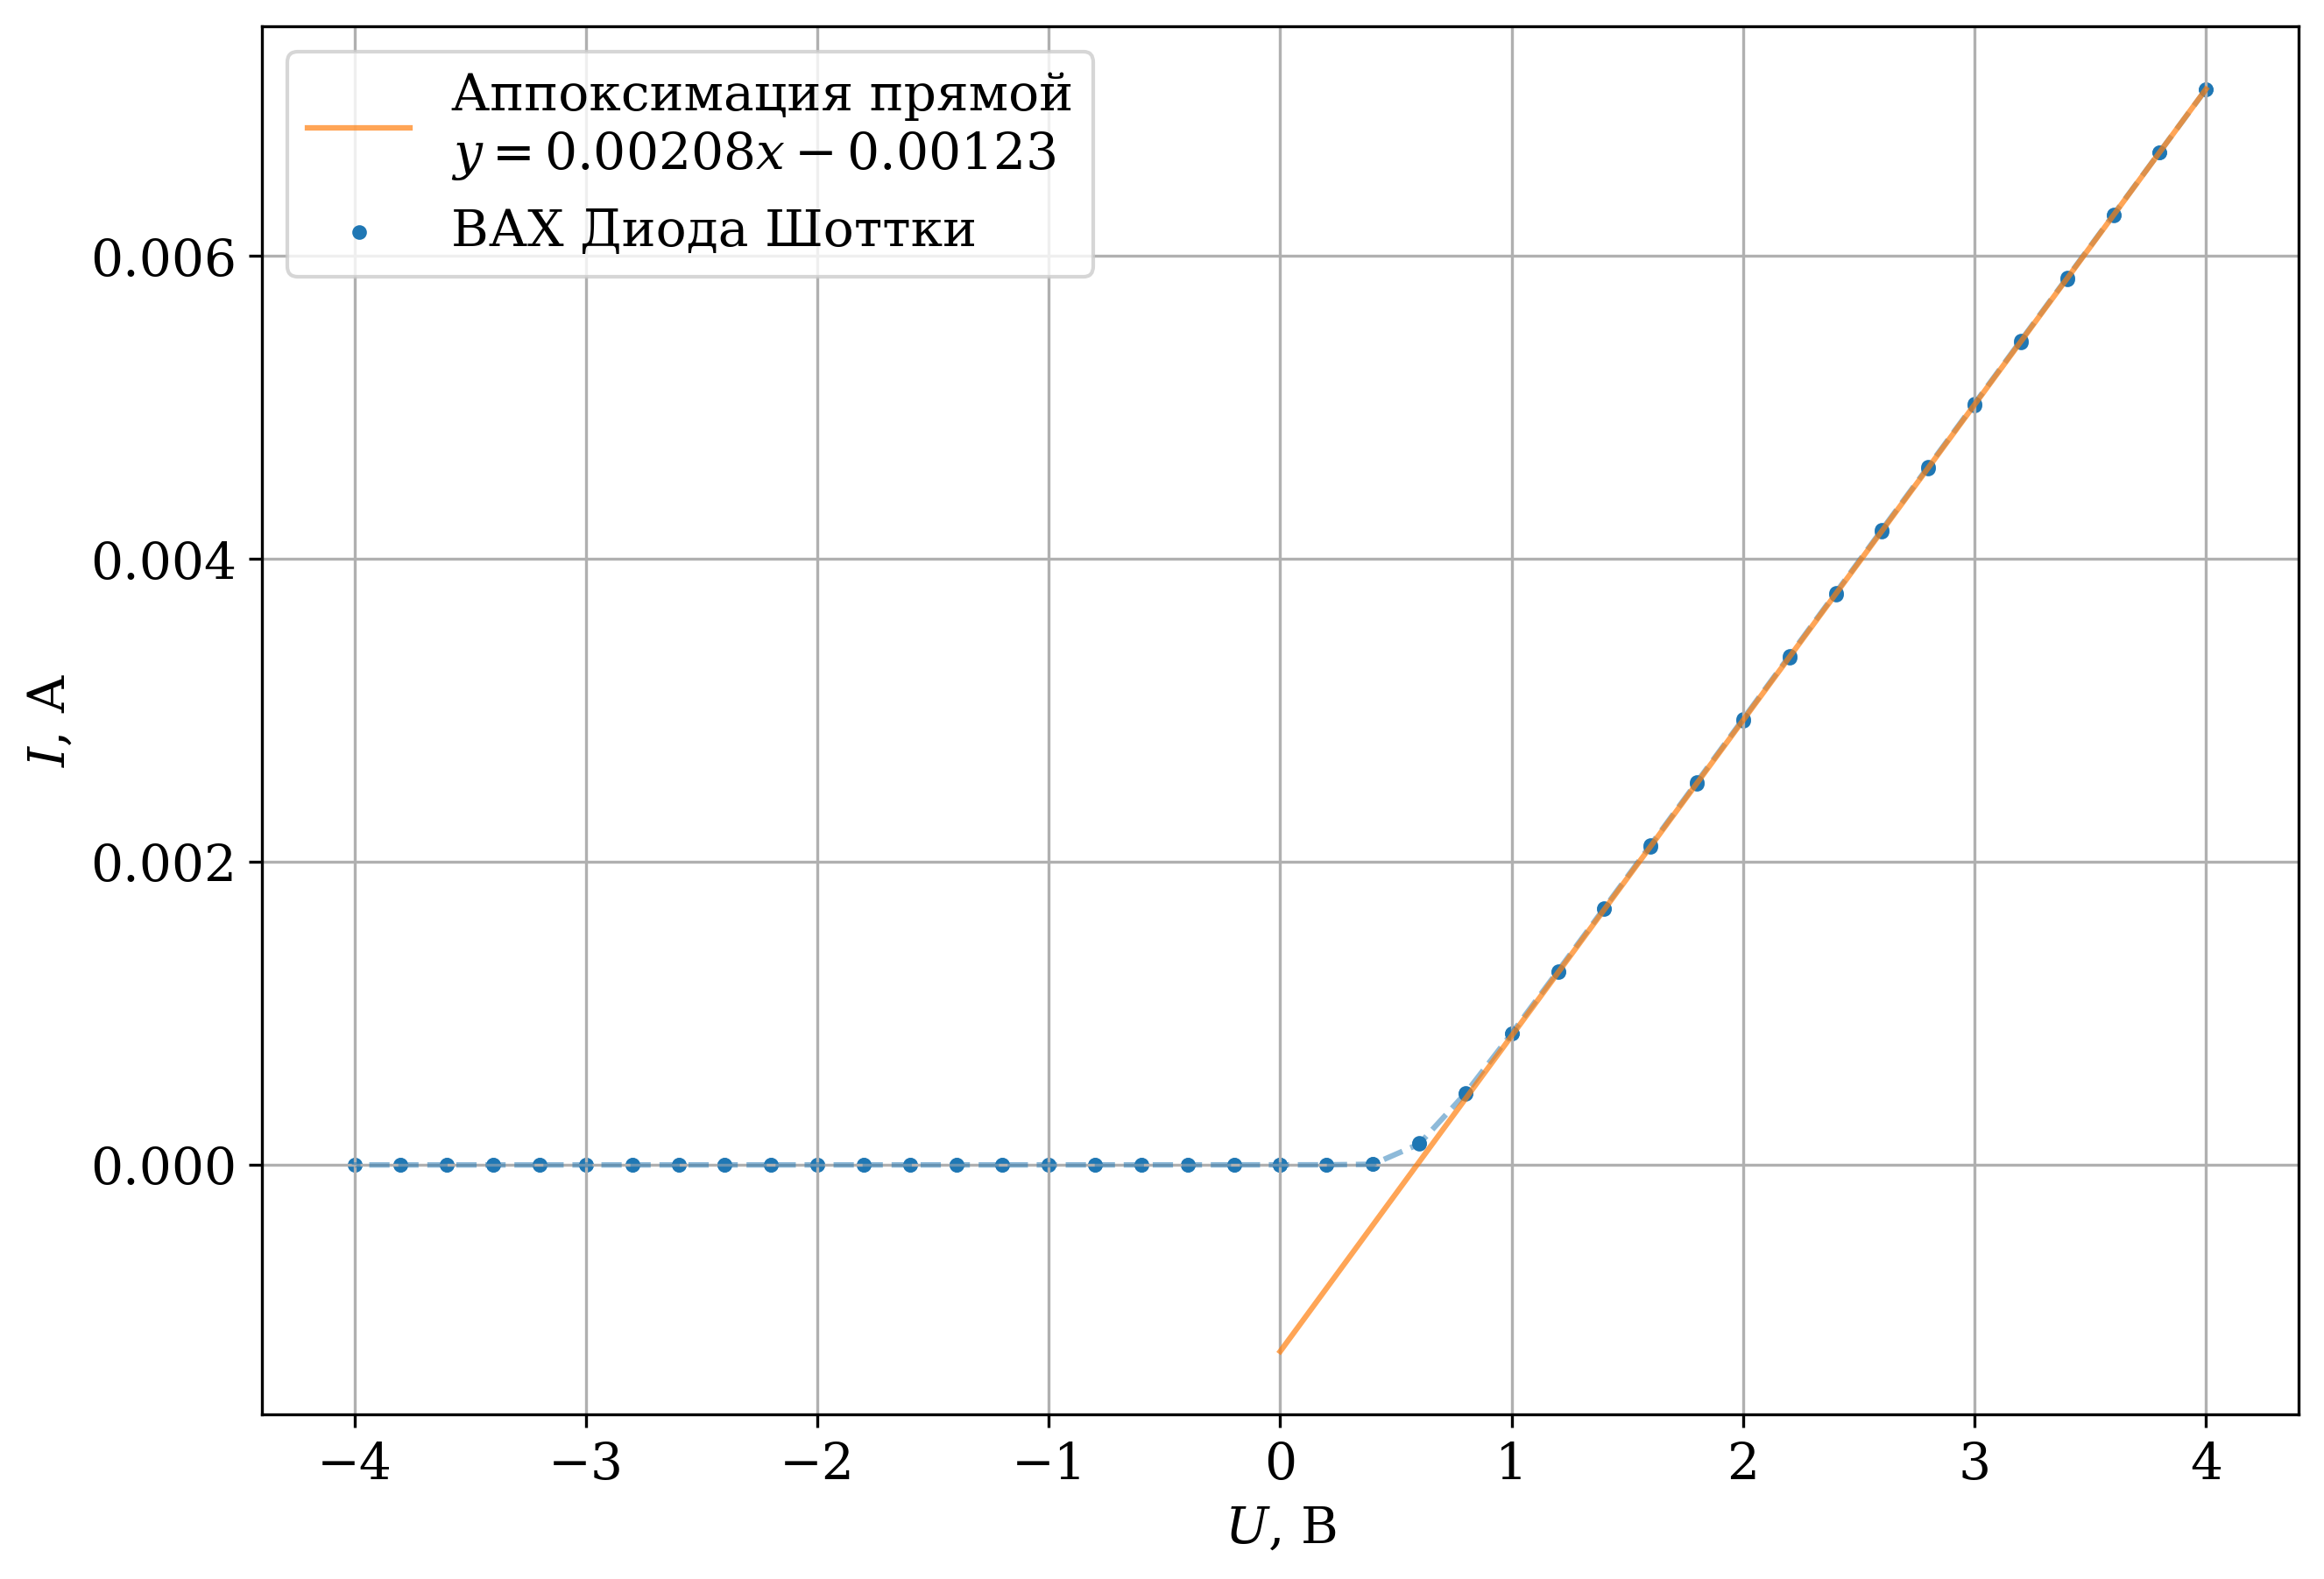

In [29]:
plt.scatter(vac.U, vac.I, marker='.', label="ВАХ Диода Шоттки")
plt.plot(vac.U[20:-20], vac.I[20:-20], ls='--', alpha=0.5)

plt.xlabel('$U$, В')
plt.ylabel('$I$, А')

arg = np.polyfit(vac.U[10:30], vac.I[10:30], 1)
f = np.poly1d(arg)

x = np.linspace(0, 4, 30)
plt.plot(x, f(x), alpha=0.7, label=f"Аппоксимация прямой\n$y={arg[0]:.5f}x {arg[1]:.5f}$")

plt.legend()

plt.savefig("vac_diode.pdf")

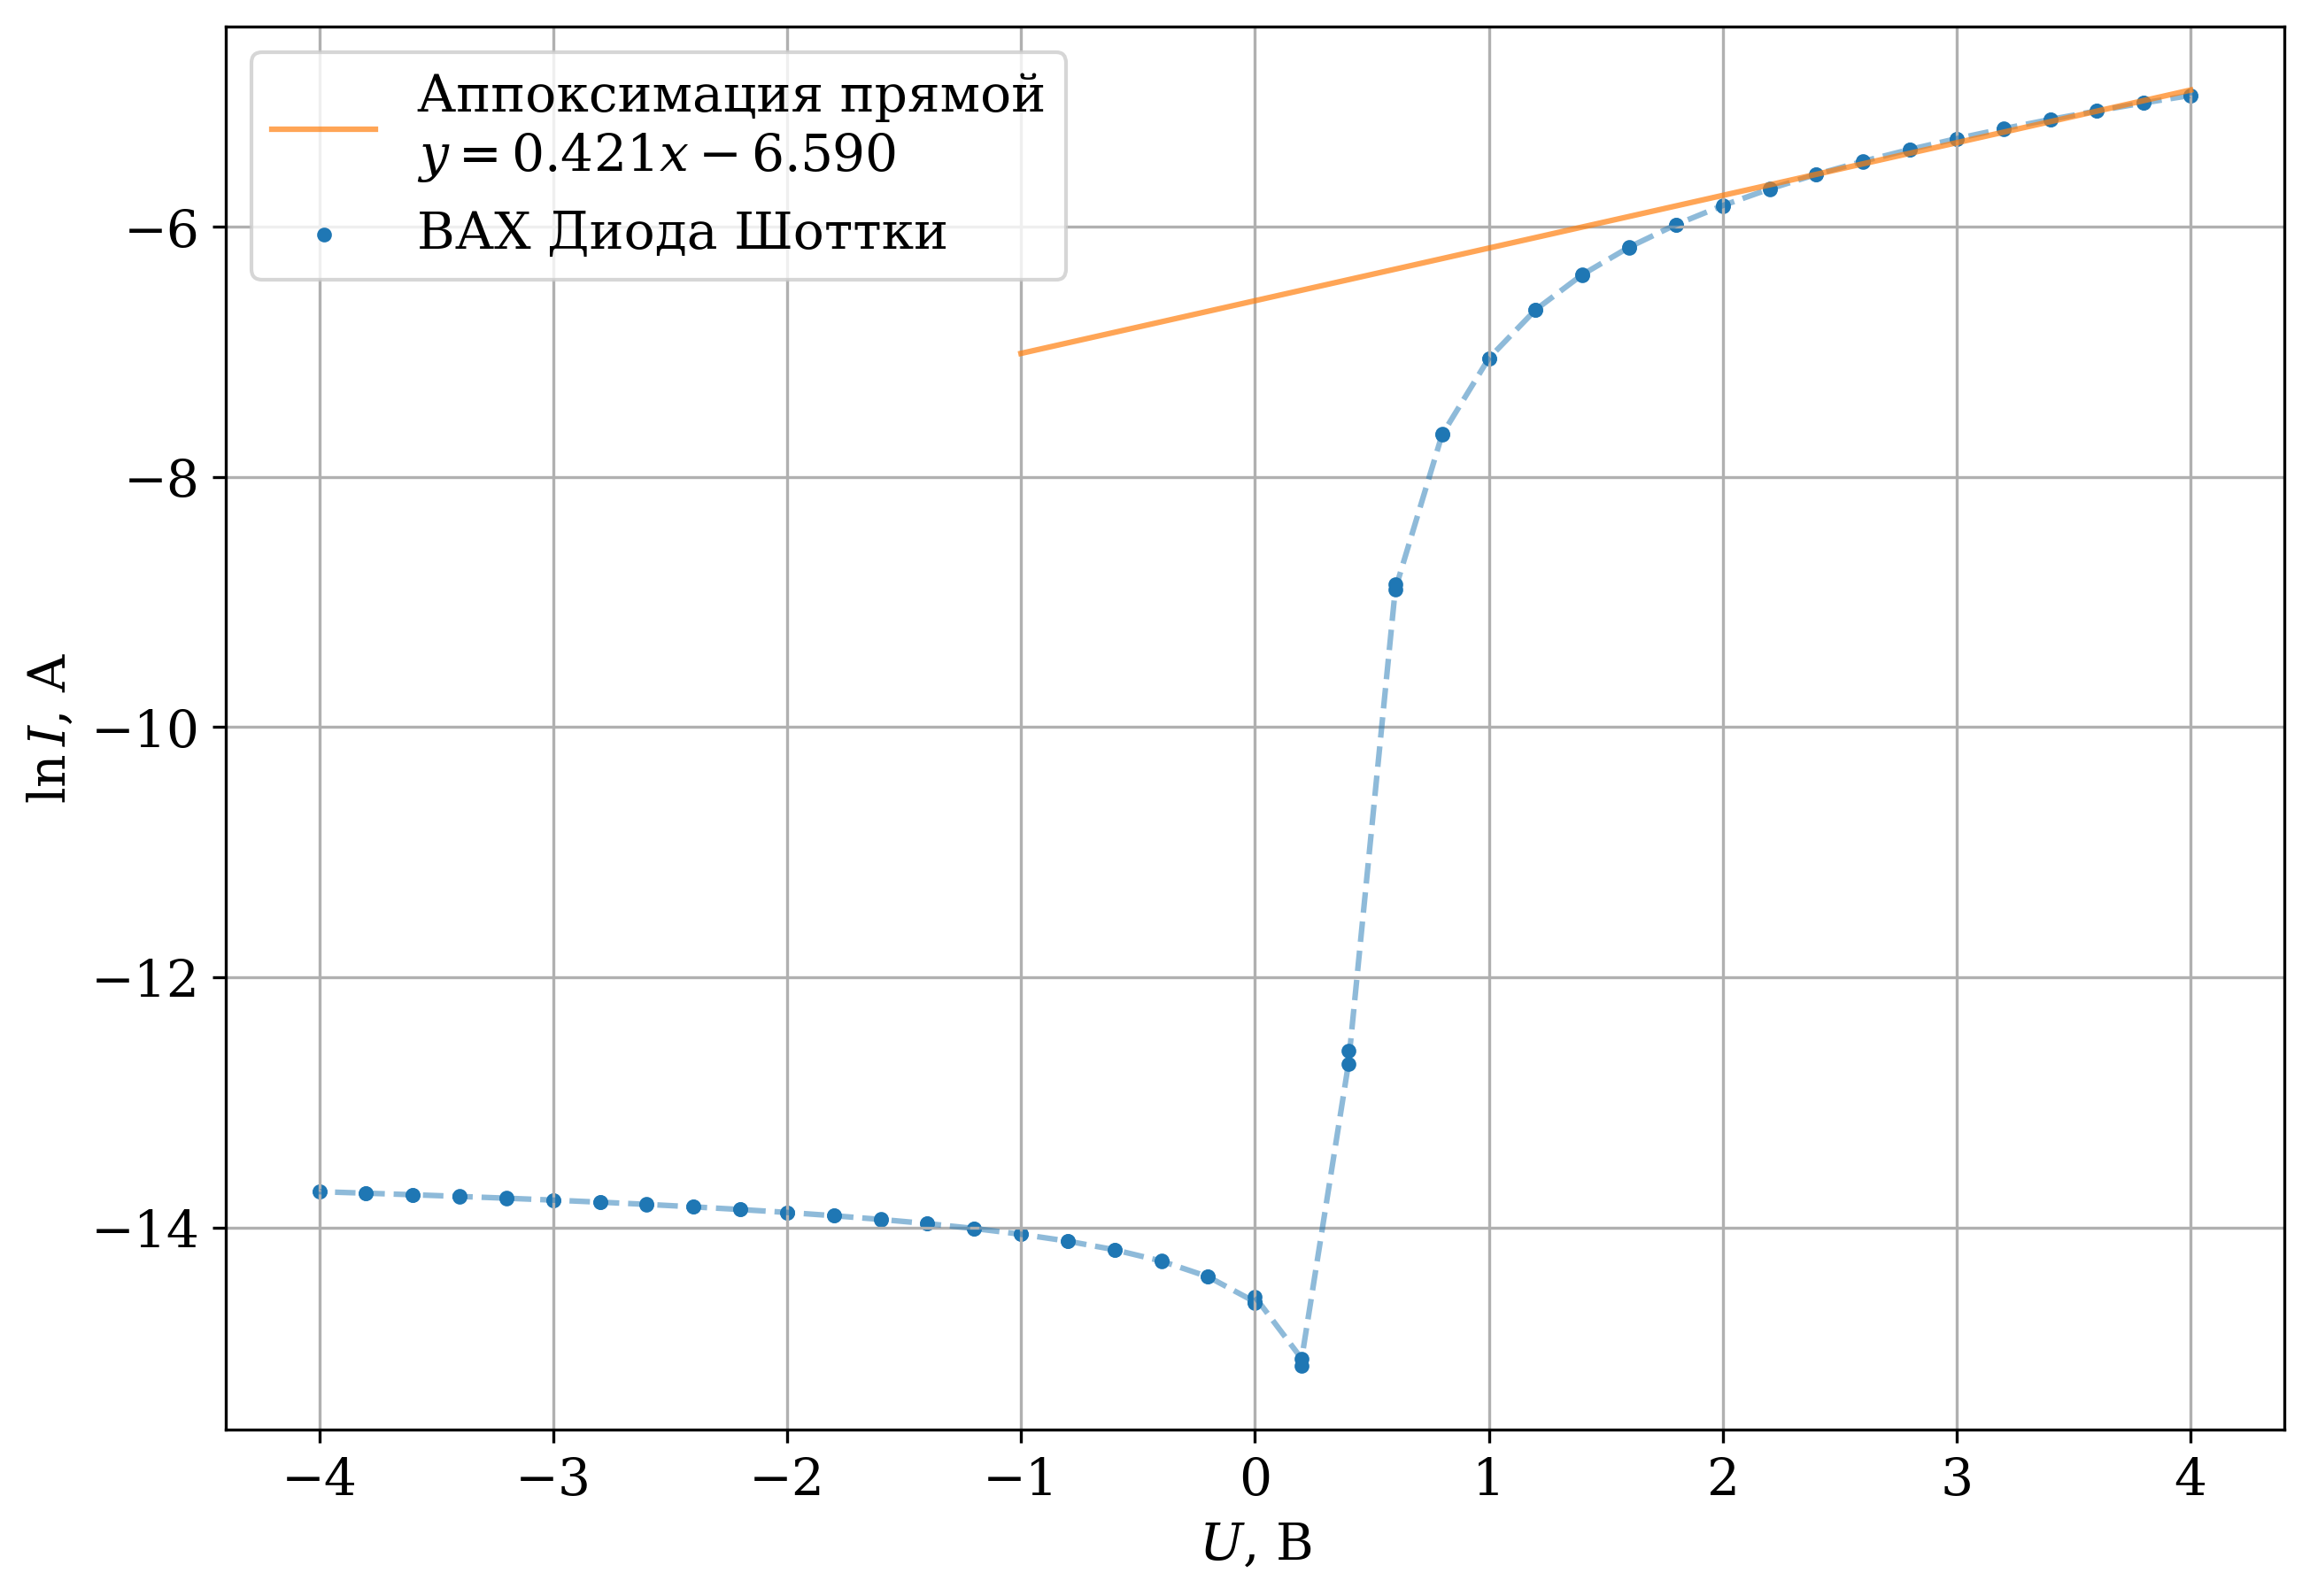

In [31]:
plt.scatter(vac.U, vac.logI, marker='.', label="ВАХ Диода Шоттки")
plt.plot(vac.U[20:-20], vac.logI[20:-20], ls='--', alpha=0.5)

plt.xlabel('$U$, В')
plt.ylabel('$\ln I$, А')

arg = np.polyfit(vac.U[10:30], vac.logI[10:30], 1)
f = np.poly1d(arg)

x = np.linspace(-1, 4, 30)
plt.plot(x, f(x), alpha=0.7, label=f"Аппоксимация прямой\n$y={arg[0]:.3f}x {arg[1]:.3f}$")

plt.legend()

plt.savefig("vac_ln_diode.pdf")

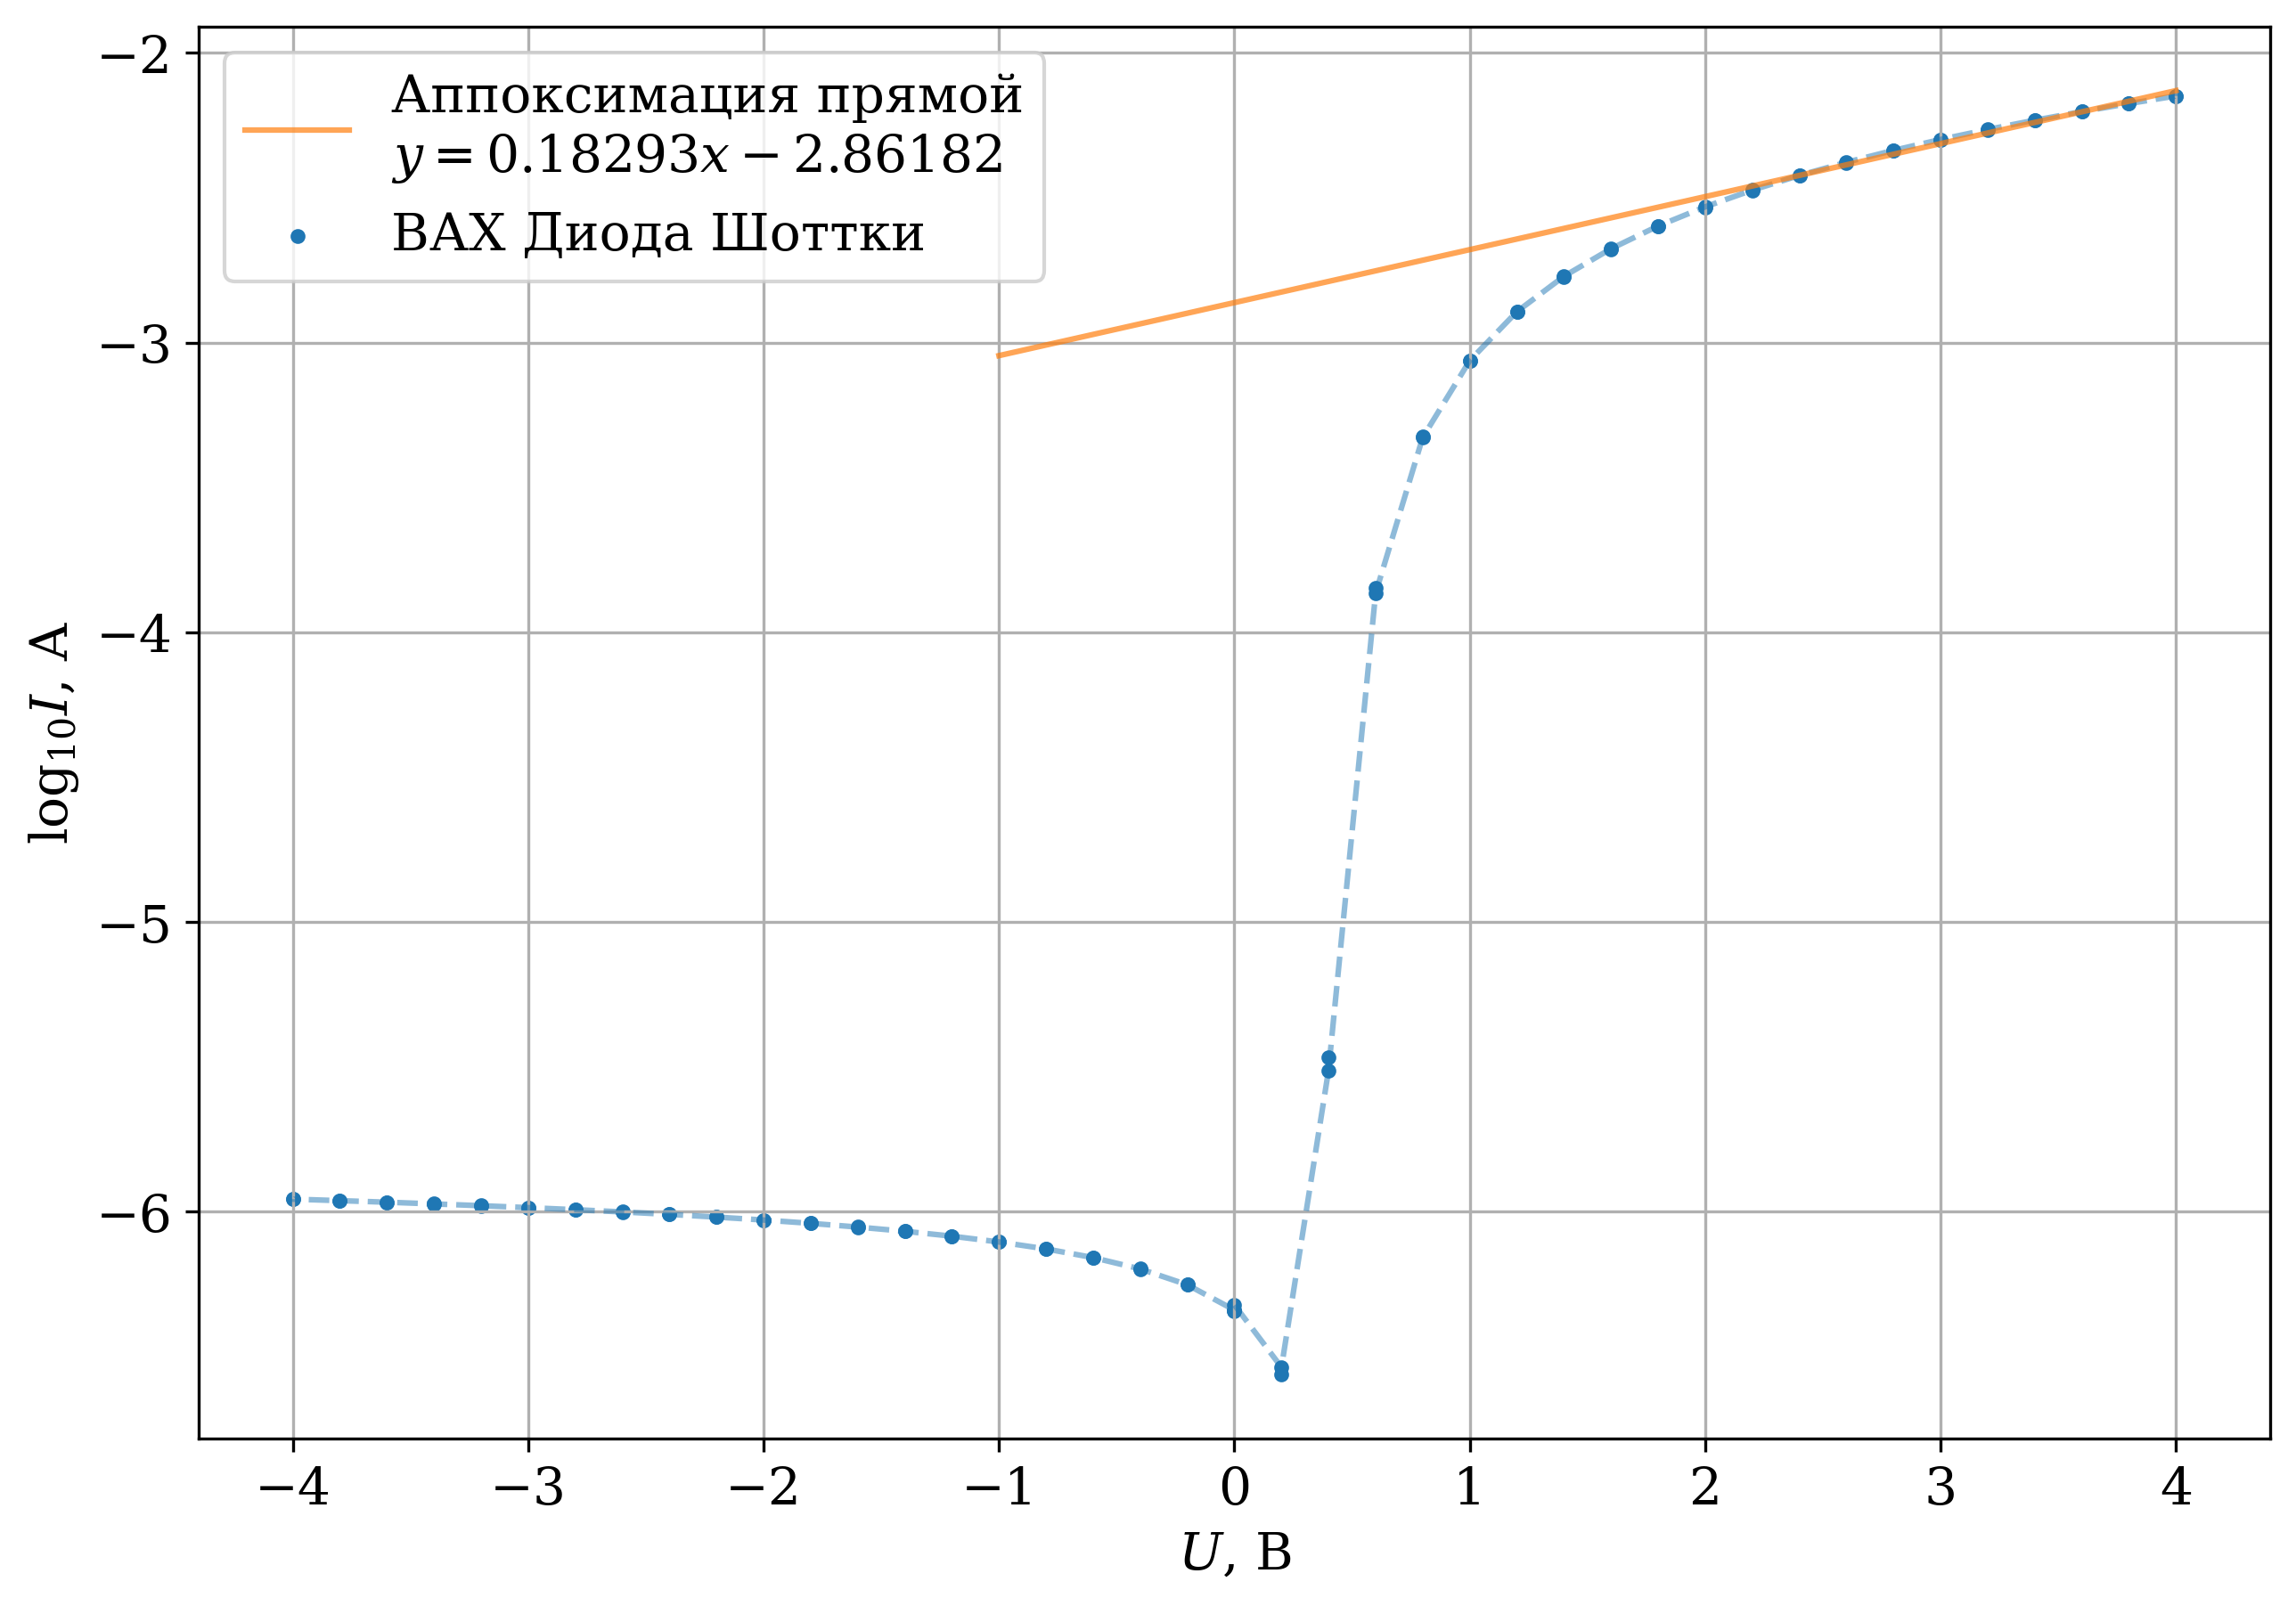

In [34]:
plt.scatter(vac.U, vac.log10I, marker='.', label="ВАХ Диода Шоттки")
plt.plot(vac.U[20:-20], vac.log10I[20:-20], ls='--', alpha=0.5)

plt.xlabel('$U$, В')
plt.ylabel('$\log_{10} I$, А')

arg = np.polyfit(vac.U[10:30], vac.log10I[10:30], 1)
f = np.poly1d(arg)

x = np.linspace(-1, 4, 30)
plt.plot(x, f(x), alpha=0.7, label=f"Аппоксимация прямой\n$y={arg[0]:.5f}x {arg[1]:.5f}$")

plt.legend()

plt.savefig("vac_log10_diode.pdf")

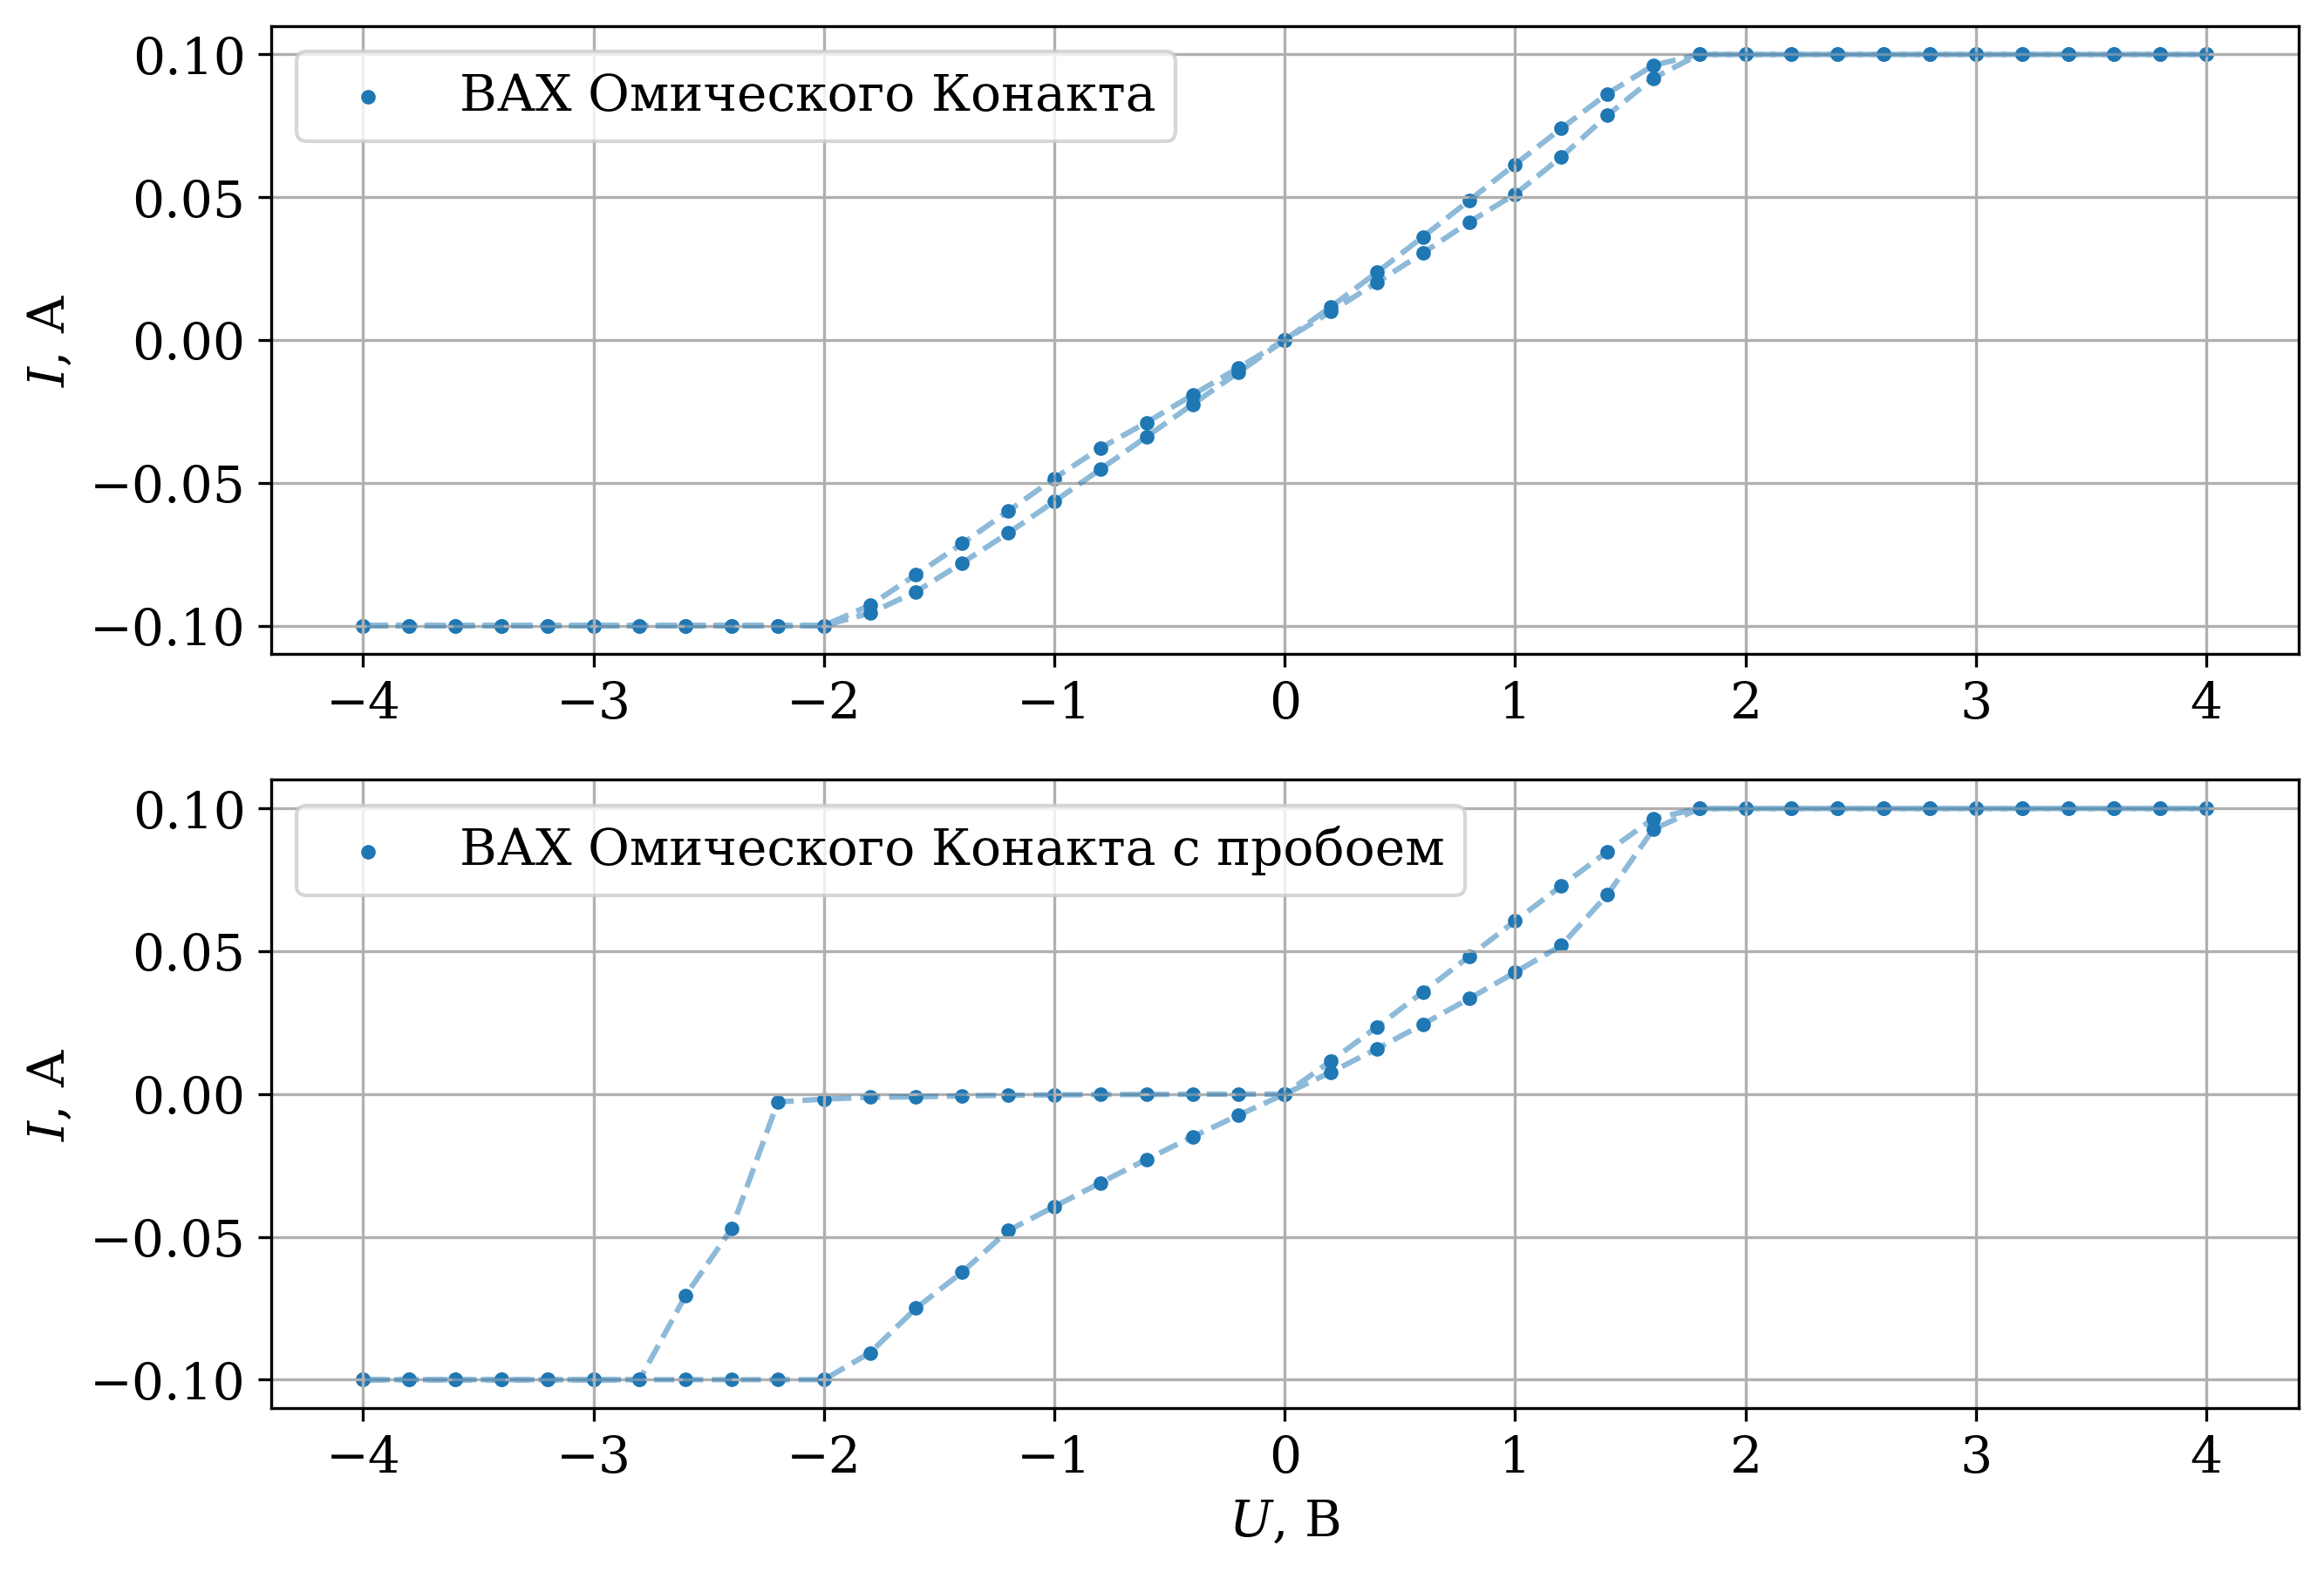

In [42]:
plt.subplot(211)
plt.scatter(ohm.U, ohm.I, marker='.', label="ВАХ Омического Конакта")
plt.plot(ohm.U, ohm.I, ls='--', alpha=0.5)

# plt.xlabel('$U$, В')
plt.ylabel('$I$, А')

plt.legend()

plt.subplot(212)
plt.scatter(prob.U, prob.I, marker='.', label="ВАХ Омического Конакта с пробоем")
plt.plot(prob.U, prob.I, ls='--', alpha=0.5)

plt.xlabel('$U$, В')
plt.ylabel('$I$, А')

# arg = np.polyfit(vac.U[10:30], vac.I[10:30], 1)
# f = np.poly1d(arg)

# x = np.linspace(0, 4, 30)
# plt.plot(x, f(x), alpha=0.7, label=f"Аппоксимация прямой\n$y={arg[0]:.5f}x {arg[1]:.5f}$")

plt.legend()

plt.savefig("vac_ohm.pdf")